<a href="https://colab.research.google.com/github/ryannovianno9/Clustering-Penguins-Species/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Background

Data yang digunakan https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

The dataset consists of 5 columns

culmen_length_mm: culmen length (mm)

culmen_depth_mm: culmen depth (mm)

flipper_length_mm: flipper length (mm)

body_mass_g: body mass (g)

sex: penguin sex

#2. IMPORT LIBRARIES

In [ ]:
!pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

#3. DATA LOADING

In [ ]:
ori_df = pd.read_csv('/content/drive/MyDrive/Cakap DS/penguins.csv')
df = ori_df.copy()
df.shape

(344, 5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


#4. DATA CLEANING

In [ ]:
dict(df.dtypes)

{'culmen_length_mm': dtype('float64'),
 'culmen_depth_mm': dtype('float64'),
 'flipper_length_mm': dtype('float64'),
 'body_mass_g': dtype('float64'),
 'sex': dtype('O')}

###4.1 MISSING VALUE

In [ ]:
df.isna()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,False,False,False,False
...,...,...,...,...,...
339,True,True,True,True,True
340,False,False,False,False,False
341,False,False,False,False,False
342,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


<Axes: >

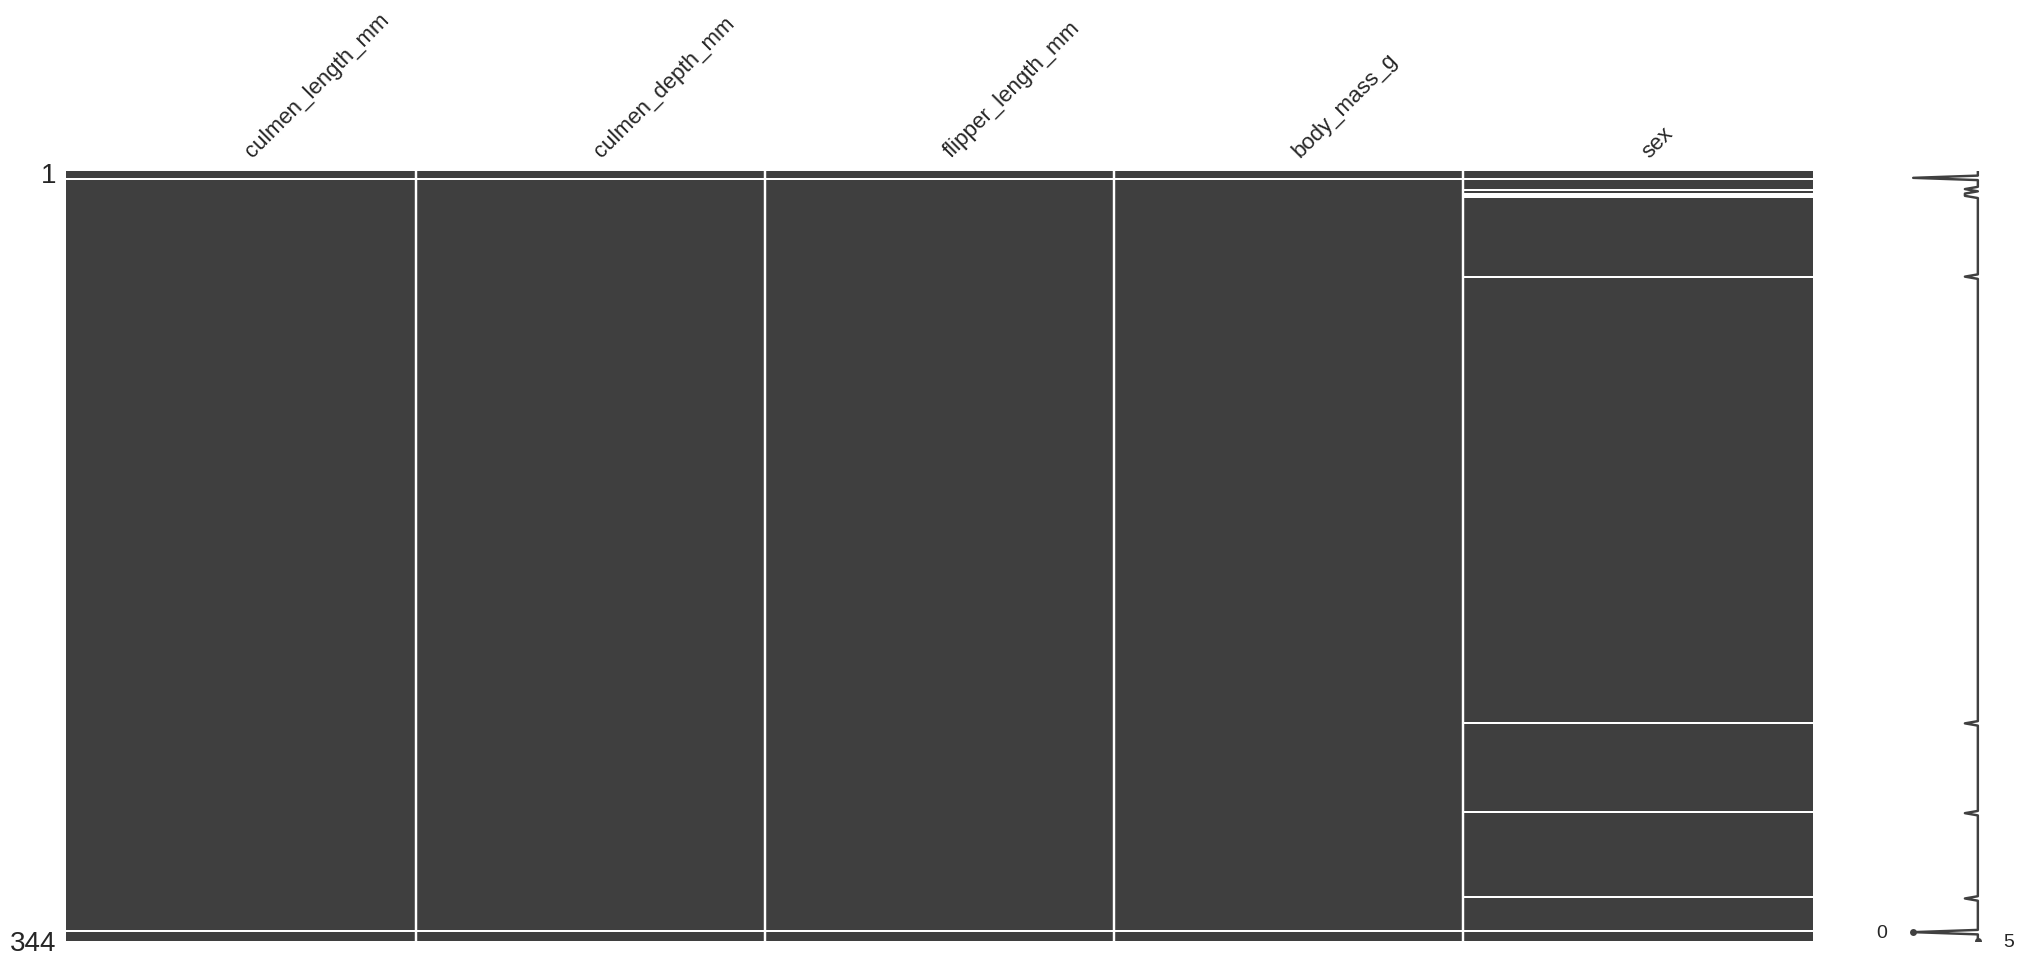

In [ ]:
import missingno as msno

msno.matrix(df)  # just to visualize. no missing value.

In [ ]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

,0
culmen_length_mm,0.581395
culmen_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,2.616279


Persentase missing value tidak lebih dari 30%, berarti data tersebut dapat dilakukan imputasi data

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

print(num_cols)
print(cat_cols)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')
Index(['sex'], dtype='object')


In [ ]:
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

<ipython-input-15-20f46626aaea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-15-20f46626aaea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
df.isna().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
df['sex'] = df['sex'].replace('.', np.nan)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['sex'].unique()

<ipython-input-18-3a8d5e365f62>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)


array(['MALE', 'FEMALE'], dtype=object)

In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

###4.2 Checking Duplicate Data

In [ ]:
df[df.duplicated()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,43.92193,17.15117,214.01462,4201.754386,MALE


In [ ]:
df.drop_duplicates(inplace=True)

#5. EDA

##5.1 Analisis Statistik

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,343.000000,343.000000,343.000000,343.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.451596,1.971904,260.176846,800.781229
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.250000,15.600000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,214.000000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


*   Total penguin ada 343 ekor
* Selain kolom country yang bertipe data kategorik (objek), kolom lainnya bertipe data numerik (integer dan float)
* Kolom culmen_length_mm, culmen_depth_mm, dan body_mass_g memiliki standar deviasi yang lebih rendah dari nilai rata-rata (mean) yang menandakan bahwa semua kolom-kolom ini dikelompokkan di dekat mean, beberapa parameter ini membantu kita menemukan mean.
* Terdapat outlier yang sangat jauh pada kolom flipper_length_mm



##5.2 Visualisasi Distribusi Data di Setiap Kolom

culmen_length_mm
Skew : 0.05


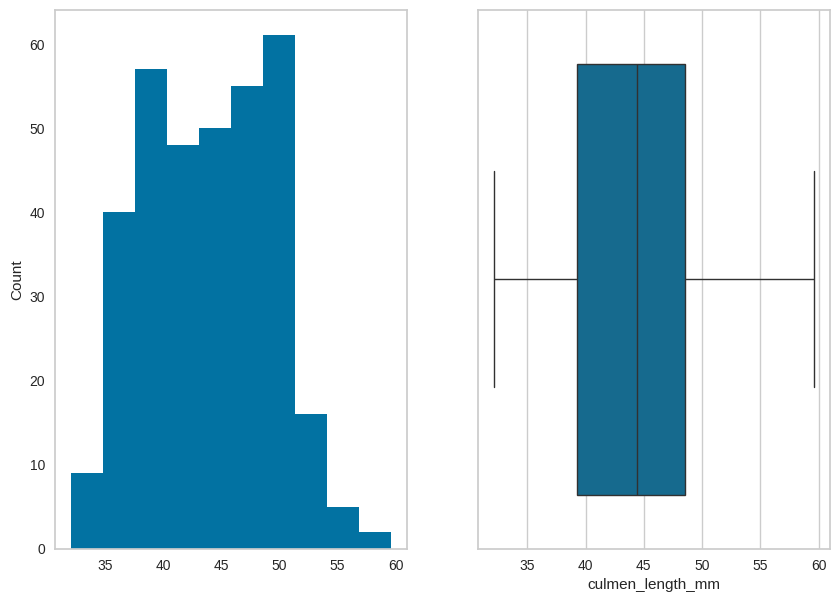

culmen_depth_mm
Skew : -0.14


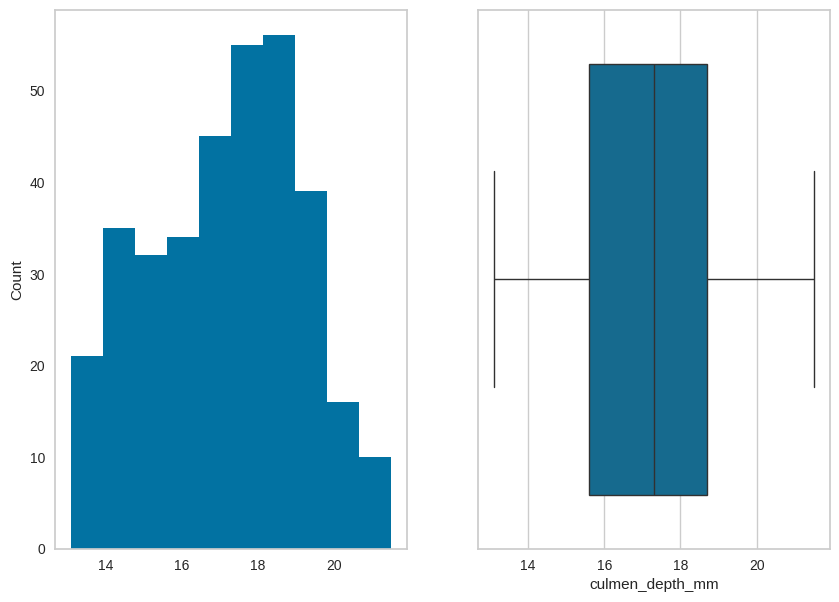

flipper_length_mm
Skew : 18.3


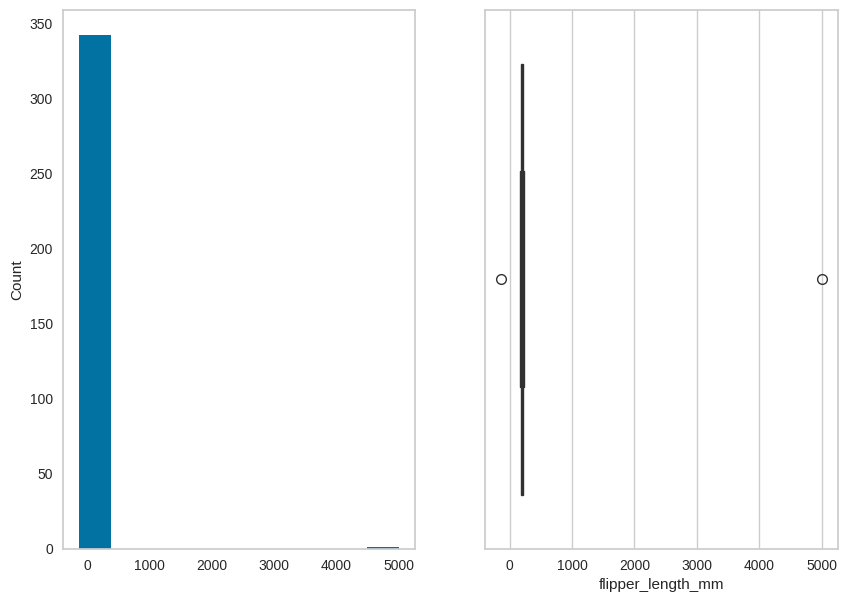

body_mass_g
Skew : 0.47


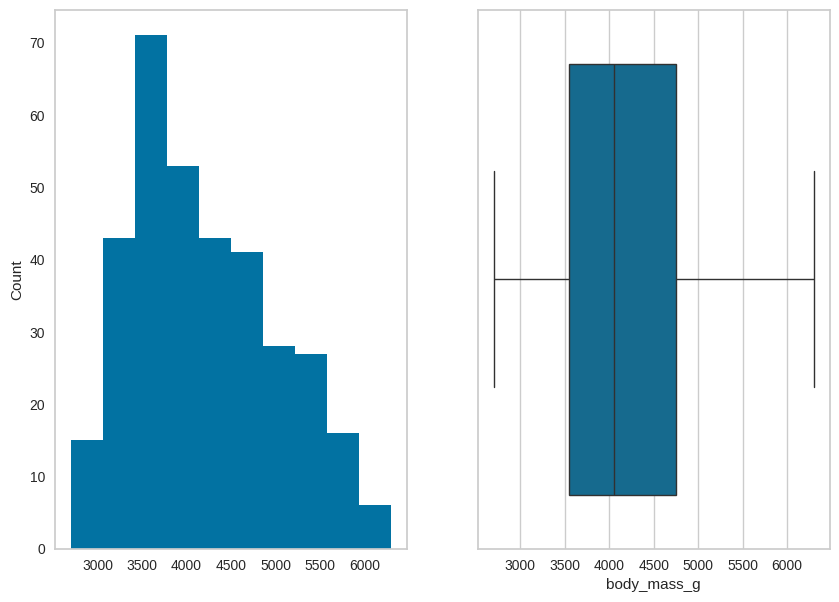

In [ ]:
# Taking all columns expect the country name. (it does not make sense, Does it?)
for col in num_cols:
    print(col)
    print("Skew :", round(df[col].skew(), 2))
    plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel("Count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

* Sebagian besar data skewed
* flipper_length_mm memiliki satu outlier sangat besar di sisi kanan

##5.3 Checking Correlation

In [ ]:
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.00000,3750.000000,1
1,39.50000,17.40000,186.00000,3800.000000,0
2,40.30000,18.00000,195.00000,3250.000000,0
3,43.92193,17.15117,214.01462,4201.754386,1
4,36.70000,19.30000,193.00000,3450.000000,0


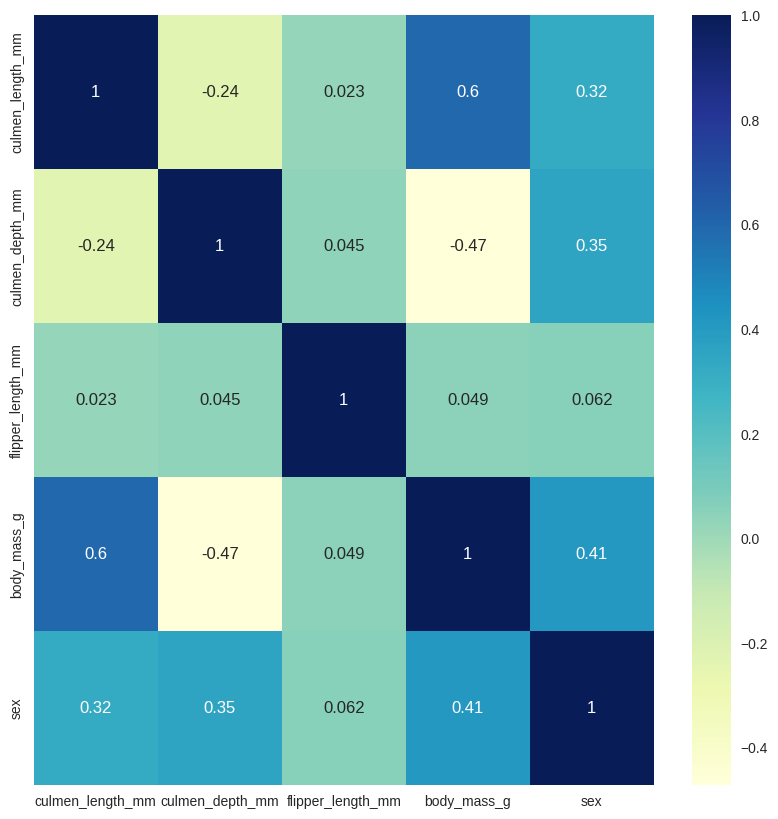

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

#6. PREPROCESSING DATA

###6.1 SCALING

In [ ]:
df2 = df.copy()

In [ ]:
#Scaling
scaler = StandardScaler()
df2 = scaler.fit_transform(df2)
df2

array([[-0.88579092,  0.78659671, -0.12707838, -0.56496624,  0.96279089],
       [-0.81231072,  0.12637225, -0.10783261, -0.502436  , -1.03864714],
       [-0.66535032,  0.43109123, -0.07319021, -1.19026869, -1.03864714],
       ...,
       [ 1.19002474, -0.7369982 ,  0.03073696,  1.93624354,  0.96279089],
       [ 0.23478213, -1.19407667, -0.00775458,  1.24841085, -1.03864714],
       [ 1.09817449, -0.53385221, -0.00390543,  1.49853182,  0.96279089]])

###6.3 DIMENSIONALLY REDUCTION

In [ ]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(df2)
PCA_ds = pd.DataFrame(pca.transform(df2), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,343.0,-1.657243e-16,1.412257,-2.602119,-1.126072,-0.079708,0.905375,3.562280
col2,343.0,-4.143106e-17,1.174398,-2.231815,-0.755668,-0.122527,1.087522,5.222853


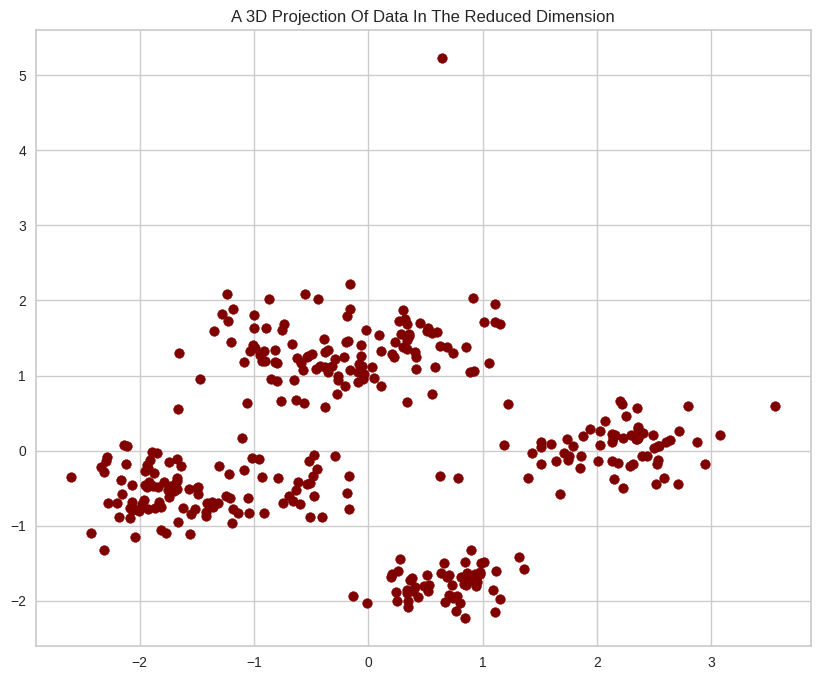

In [ ]:
#A 2D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
PCA_ds

,col1,col2
0,-0.814070,1.178457
1,-1.213166,-0.635024
2,-1.673746,-0.361836
3,0.335707,0.648202
4,-2.111738,0.059946
...,...,...
338,1.149666,-1.974322
339,0.946811,-1.754517
340,2.539245,0.062030
341,0.978057,-1.617301


#7. Menentukan Jumlah Clusters

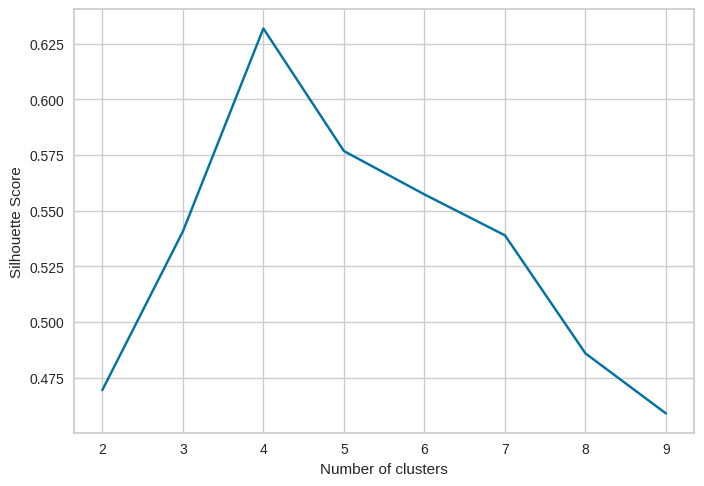

In [ ]:
# Silhoutte score dict
sc = {}

# iterating over a range of ks fitting it to k-means and getting the silhoute score for each.
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(PCA_ds)
    labels = kmeans.predict(PCA_ds)
    sc[k] = silhouette_score(PCA_ds, labels)

# Lets plot the finding - Maybe we will find an elbow
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
sc

{2: 0.4695069396910901,
 3: 0.5407021948103992,
 4: 0.6318837650760851,
 5: 0.5768536316573398,
 6: 0.5573703092170028,
 7: 0.5389962284190816,
 8: 0.4859724358825667,
 9: 0.45899964934971527}

Silhouette score tertinggi pada k = 4

#8. BUILDING MODEL

###8.1 K-MEANS CLUSTERING

In [ ]:
#Initiating the Agglomerative Clustering model
kmeans_model = KMeans(4)
# fit model and predict clusters
yhat_K3 = kmeans_model.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_K3
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_K3

In [ ]:
df['Clusters']

,Clusters
0,2
1,0
2,0
3,2
4,0
...,...
338,3
340,3
341,1
342,3


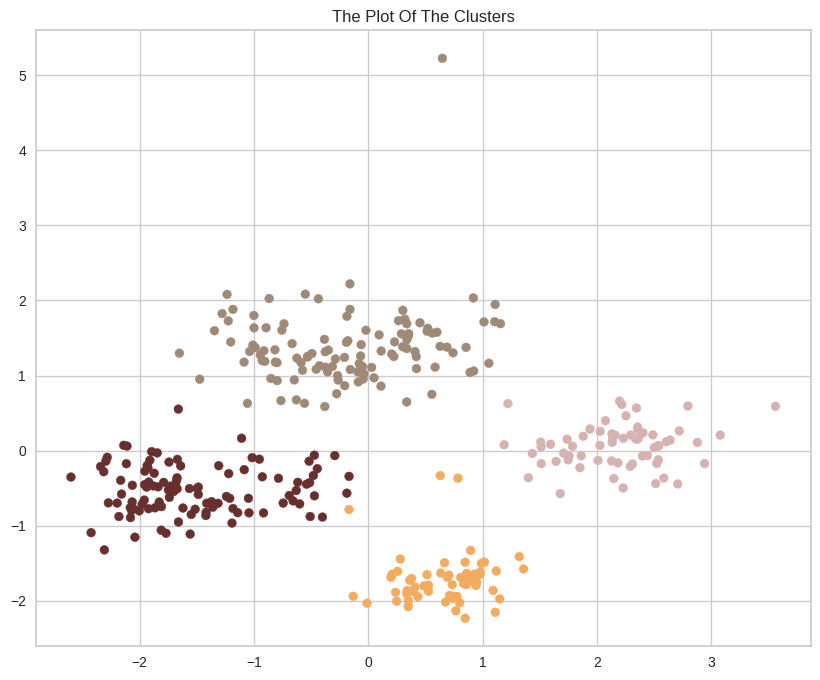

In [ ]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

#9. EVALUASI MODEL

Model terbaik adalah Gaussian Mixture clustering dan model terbaik akan digunakan untuk melakukan evaluasi model dan model inference.

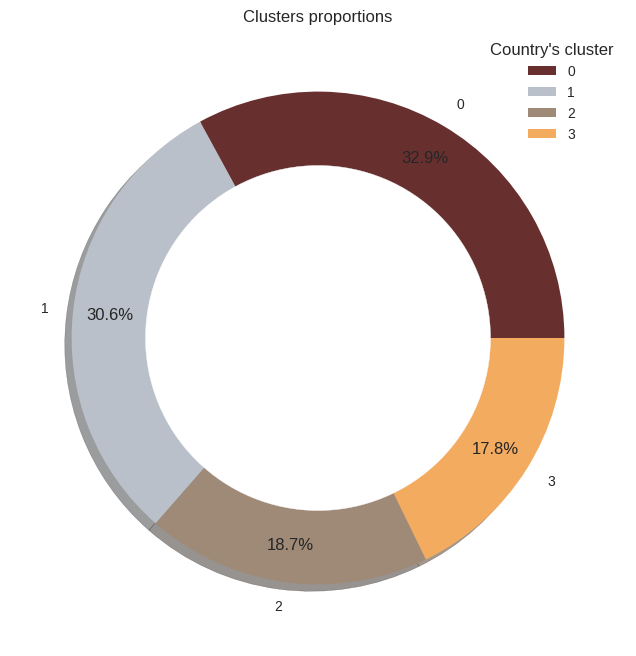

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"]
sizes = dict(df['Clusters'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors = pal)
plt.legend(title="Country's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [ ]:
df['Clusters'].value_counts()

,count
Clusters,
2,113
0,105
1,64
3,61


In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Clusters
0,39.10000,18.70000,181.00000,3750.000000,1,2
1,39.50000,17.40000,186.00000,3800.000000,0,0
2,40.30000,18.00000,195.00000,3250.000000,0,0
3,43.92193,17.15117,214.01462,4201.754386,1,2
4,36.70000,19.30000,193.00000,3450.000000,0,0


<ipython-input-39-6826cfcb3d9f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["culmen_length_mm"],x=df["Clusters"], palette= pal)


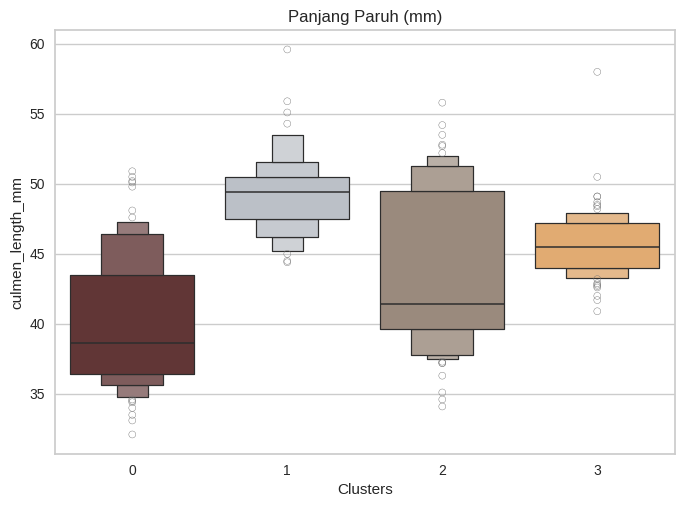

In [ ]:
#Plotting the number of income
plt.figure()
pl=sns.boxenplot(y=df["culmen_length_mm"],x=df["Clusters"], palette= pal)
pl.set_title("Panjang Paruh (mm)")
plt.show()

* Group 0 : Sebagian besar penguin memiliki paruh yang pendek - menengah
* Group 1 : Sebagian besar penguin memiliki paruh yang panjang
* Group 2 : Sebagian besar penguin memiliki paruh menengah dan ada beberapa yang panjang maupun pendek
* Group 3 : sebagian besar penguin memiliki paruh menengah

<ipython-input-40-55481906af04>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["culmen_depth_mm"],x=df["Clusters"], palette= pal)


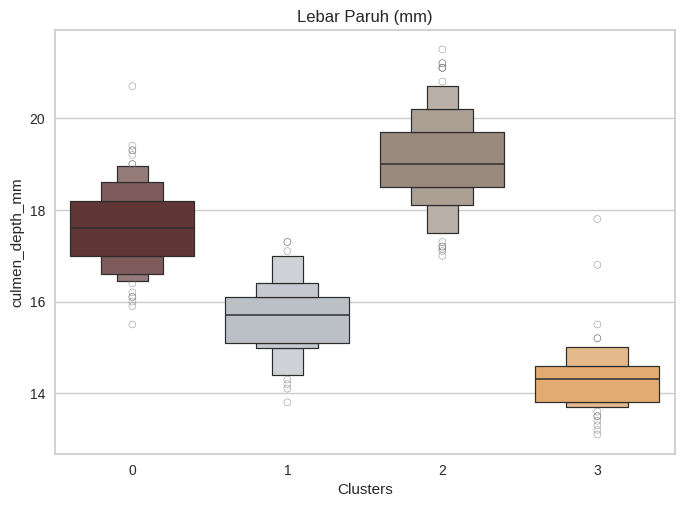

In [ ]:
#Plotting the number of exports
plt.figure()
pl=sns.boxenplot(y=df["culmen_depth_mm"],x=df["Clusters"], palette= pal)
pl.set_title("Lebar Paruh (mm)")
plt.show()

* Group 0 : Lebar paruh cukup lebar
* Group 1 : Lebar paruh menengah
* Group 2 : Lebar paruh panjang
* Group 3 : Lebar paruh pendek

<ipython-input-41-a96eca11ee36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["flipper_length_mm"],x=df["Clusters"], palette= pal)


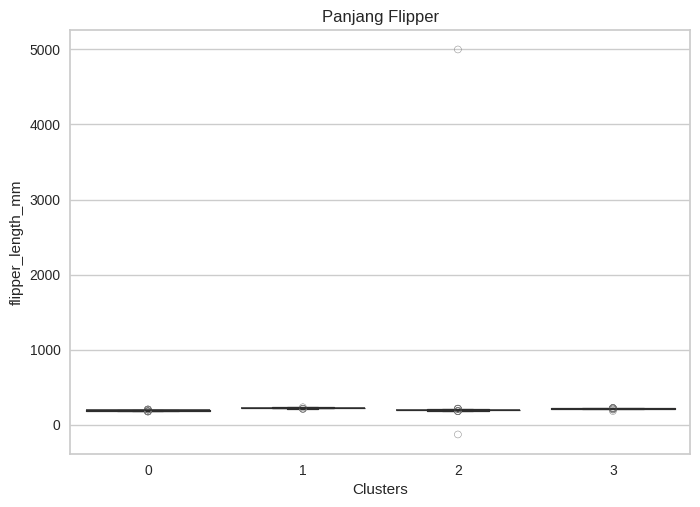

In [ ]:
#Plotting the number of child mortality
plt.figure()
pl=sns.boxenplot(y=df["flipper_length_mm"],x=df["Clusters"], palette= pal)
pl.set_title("Panjang Flipper")
plt.show()

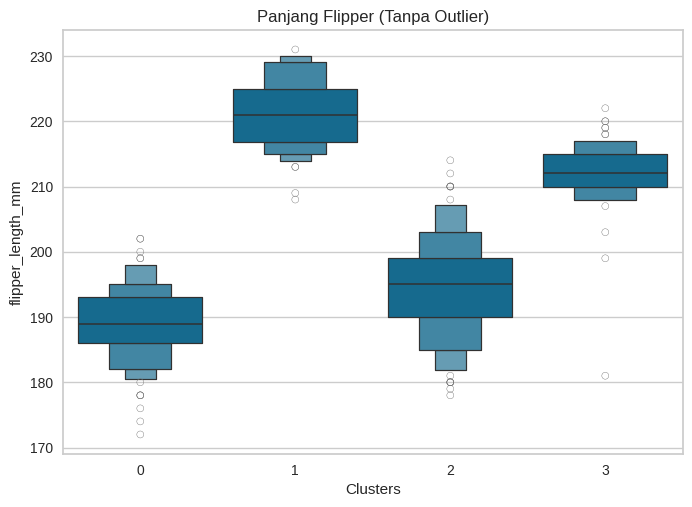

In [ ]:
Q1 = df['flipper_length_mm'].quantile(0.25)
Q3 = df['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data tanpa outlier
flipper_length_mm2 = df[(df['flipper_length_mm'] >= lower_bound) & (df['flipper_length_mm'] <= upper_bound)]

# Visualisasi ulang tanpa outlier
sns.boxenplot(data=flipper_length_mm2, x="Clusters", y="flipper_length_mm")
plt.title("Panjang Flipper (Tanpa Outlier)")
plt.show()

* Group 0 : Flipper Pendek - Menengah
* Group 1 : Flipper panjang
* Group 2 : Flipper Menengah - Panjang
* Group 3 : Flipper panjang

<ipython-input-43-02b795fb4b83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["body_mass_g"],x=df["Clusters"], palette= pal)


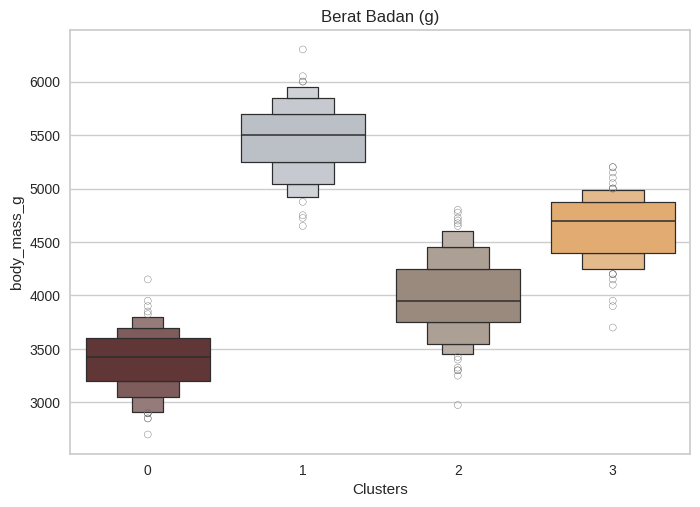

In [ ]:
#Plotting the number of Life Expectancy
plt.figure()
pl=sns.boxenplot(y=df["body_mass_g"],x=df["Clusters"], palette= pal)
pl.set_title("Berat Badan (g)")
plt.show()

* Group 0 : Paling ringan
* Group 1 : Paling berat
* Group 2 : Ringan - Menengah
* Group 3 : Menengah - berat

<ipython-input-44-b87c715e0070>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["sex"],x=df["Clusters"], palette= pal)


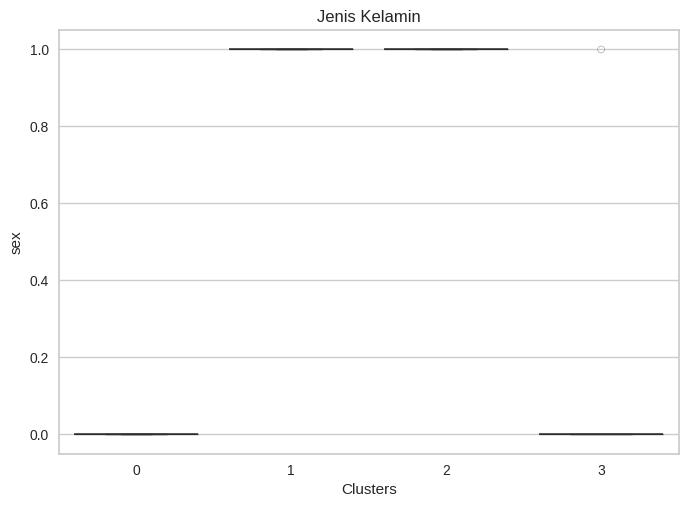

In [ ]:
#Plotting the number of GDP per Capita
plt.figure()
pl=sns.boxenplot(y=df["sex"],x=df["Clusters"], palette= pal)
pl.set_title("Jenis Kelamin")
plt.show()

* Group 0 : Betina
* Group 1 : Jantan
* Group 2 : Jantan
* Group 3 : Betina, namun ada yang jantan

In [ ]:
# Lets get mean and median for each variable in the dataset
mean = df.groupby("Clusters").mean()
median = df.groupby("Clusters").median()

# Creating dataframe with means and medians
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ["Group0_mean", "Group1_mean", "Group2_mean", "Group3_mean", "Group0_median", "Group1_median", "Group2_median","Group3_median"]
df_kmeans.T

,Group0_mean,Group1_mean,Group2_mean,Group3_mean,Group0_median,Group1_median,Group2_median,Group3_median
culmen_length_mm,39.979048,49.310938,43.529398,45.781967,38.6,49.45,41.4,45.5
culmen_depth_mm,17.617143,15.667188,19.076559,14.339344,17.6,15.70,19.0,14.3
flipper_length_mm,189.028571,221.265625,234.203669,212.016393,189.0,221.00,195.0,212.0
body_mass_g,3411.904762,5450.390625,3991.165968,4641.393443,3425.0,5500.00,3950.0,4700.0
sex,0.000000,1.000000,1.000000,0.016393,0.0,1.00,1.0,0.0


#9. PROFILING

**Cluster 0**

---
- Paruh: Pendek-menengah, cukup lebar.
- Flipper: Pendek-menengah.
- Bobot: Paling ringan.
- Jenis Kelamin: Mayoritas betina.
- Kesimpulan: Kelompok ini mencirikan penguin yang relatif kecil dan ringan, - didominasi oleh betina, dengan adaptasi tubuh yang mungkin lebih cocok untuk lingkungan darat atau perairan yang tidak terlalu dalam.

**Cluster 1**

---
- Paruh: Panjang, lebar menengah.
- Flipper: Panjang.
- Bobot: Paling berat.
- Jenis Kelamin: Seluruhnya jantan.
- Kesimpulan: Kelompok ini mencerminkan penguin yang lebih besar, kuat, dan berat. Mereka mungkin lebih adaptif untuk menyelam lebih dalam dan berburu mangsa yang lebih besar.


**Cluster 2**

---
- Paruh: Menengah (dengan variasi panjang dan pendek), lebar panjang.
- Flipper: Menengah-panjang.
- Bobot: Ringan-menengah.
- Jenis Kelamin: Mayoritas jantan.
- Kesimpulan: Kelompok ini adalah penguin dengan ciri-ciri yang cukup seimbang, baik dalam ukuran maupun berat badan, menunjukkan kemungkinan fleksibilitas dalam adaptasi lingkungan.

**Cluster 3**

---
- Paruh: Menengah, lebar pendek.
- Flipper: Panjang.
- Bobot: Menengah-berat.
- Jenis Kelamin: Mayoritas betina dengan beberapa jantan.
- Kesimpulan: Kelompok ini mewakili penguin dengan flipper panjang (baik untuk berenang jarak jauh), bobot yang lebih berat, dan keanekaragaman jenis kelamin.


# 10. Save Model


In [ ]:
import pickle

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans_model, file)

In [ ]:
with open('kmeans_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

test_data = pd.DataFrame({
    'culmen_length_mm': np.random.uniform(35, 50, 10),
    'culmen_depth_mm':np.random.uniform(15, 25, 10),
    'flipper_length_mm': np.random.uniform(180, 220, 10),
    'body_mass_g': np.random.uniform(3000, 5000, 10),
    'sex': np.random.choice(['MALE', 'FEMALE'], 10)
})

# hasil = saved_model.predict(test_data)
# hasil

test_data["sex"] = le.fit_transform(test_data["sex"])
new_data = test_data.copy()

test_data = scaler.fit_transform(test_data)


pca = PCA(n_components=2)
pca.fit(test_data)
PCA_ds = pd.DataFrame(pca.transform(test_data), columns=(["col1","col2"]))

new_data['Predicted Cluster'] = saved_model.predict(PCA_ds)

new_data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Predicted Cluster
0,46.068454,15.407288,204.634004,4284.838556,1,2
1,43.315311,23.554606,205.403746,3053.022621,1,0
2,44.175811,22.036579,181.812160,4171.551163,1,0
3,41.294001,19.741738,194.984505,4880.460483,0,1
4,38.715965,15.978342,205.034397,4150.948356,0,2
5,40.339590,19.916159,200.125450,3776.339852,1,0
6,46.367692,19.734718,214.259594,4286.576437,0,2
7,35.215902,16.732019,206.347745,3916.505781,1,2
8,36.741090,19.338516,186.517377,4091.233579,1,3
9,35.690040,18.985047,182.822750,4882.929618,0,1
